<a href="https://colab.research.google.com/github/saraisab/machineLearning/blob/main/ml_9_vecinos_kkn_modelo_teoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k vecinos mas cercanos KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vehiculos = pd.read_csv('vehiculos.csv')
vehiculos

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,saab
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,van
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0,saab
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0,saab


In [2]:
vehiculos['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [3]:
y = vehiculos['vehicle_class']
X = vehiculos.drop('vehicle_class', axis=1)


In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [5]:
#fase de entrenamiento del modelo

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [6]:
#hacemos las predicciones
predicciones = knn.predict(X_test)


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

#crea la matriz de confusion en base a las respuestas correctas con respecto a las predicciones
print(confusion_matrix(y_test, predicciones))
#precision del modelo
print(classification_report(y_test, predicciones))

[[36  0  7  3]
 [ 5 15 21  5]
 [ 5 20 16  3]
 [ 2  0  2 30]]
              precision    recall  f1-score   support

         bus       0.75      0.78      0.77        46
        opel       0.43      0.33      0.37        46
        saab       0.35      0.36      0.36        44
         van       0.73      0.88      0.80        34

    accuracy                           0.57       170
   macro avg       0.56      0.59      0.57       170
weighted avg       0.56      0.57      0.56       170



In [8]:
#para obtener una tasa de error menor hay q cambiar el n_neighbors
tasa_error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediccion_i = knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != y_test))


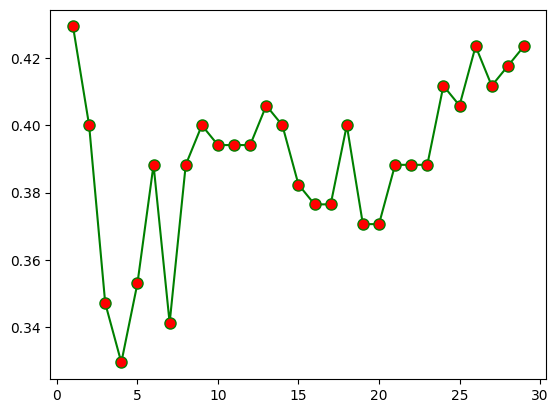

In [9]:
#rango de valores para ver la tasa de error
valores = range(1,30)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize=8)

In [10]:
#prueba para ver el modelo mas preciso
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predicciones = knn.predict(X_test)
print(classification_report(y_test, predicciones))


              precision    recall  f1-score   support

         bus       0.76      0.91      0.83        46
        opel       0.55      0.46      0.50        46
        saab       0.47      0.36      0.41        44
         van       0.74      0.94      0.83        34

    accuracy                           0.65       170
   macro avg       0.63      0.67      0.64       170
weighted avg       0.63      0.65      0.63       170



### **K vecinos Ejercicio 12 MACHINE LEARNING**

En este ejercicio debes desarrollar una función que aplique el algoritmo de los k vecinos más cercanos (KNN) para un problema de clasificación.

Supongamos que tienes un conjunto de datos que contiene información sobre diferentes tipos de flores, y deseas predecir el tipo de flor en función de las características de pétalos y sépalos.

Utilizaremos el conjunto de datos Iris, que es un conjunto de datos de clasificación ampliamente utilizado en el aprendizaje automático.


def knn_clasificacion(datos, k=3):


    # Ejemplo de uso con el conjunto de datos Iris
    data = pd.read_csv('iris.csv')  # Reemplaza 'iris.csv' con tu archivo de datos
    modelo_knn = knn_clasificacion(data, k=3)
     
    # Estimaciones de clasificación para nuevas muestras
    nuevas_muestras = pd.DataFrame({
        'LargoSepalo': [5.1, 6.0, 4.4],
        'AnchoSepalo': [3.5, 2.9, 3.2],
        'LargoPetalo': [1.4, 4.5, 1.3],
        'AnchoPetalo': [0.2, 1.5, 0.2]
    })
     
    estimaciones_clasificacion = modelo_knn.predict(nuevas_muestras)
    print("Estimaciones de Clasificación:")
    print(estimaciones_clasificacion)


Resultados:


    Estimaciones de Clasificación:
    ['setosa' 'versicolor' 'setosa']

In [18]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



# Función de clasificación KNN
def knn_clasificacion(datos, k=3):
    y = datos['Species']
    X = datos.drop('Species', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Ejemplo de uso con el conjunto de datos Iris
data = pd.read_csv('Iris.csv')  # Reemplaza 'iris.csv' con tu archivo de datos
modelo_knn = knn_clasificacion(data, k=3)

# Estimaciones de clasificación para nuevas muestras
nuevas_muestras = pd.DataFrame({
    'LargoSepalo': [5.1, 6.0, 4.4],
    'AnchoSepalo': [3.5, 2.9, 3.2],
    'LargoPetalo': [1.4, 4.5, 1.3],
    'AnchoPetalo': [0.2, 1.5, 0.2]
})

estimaciones_clasificacion = modelo_knn.predict(nuevas_muestras)
print("Estimaciones de Clasificación:")
print(estimaciones_clasificacion)




ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AnchoPetalo
- AnchoSepalo
- LargoPetalo
- LargoSepalo
Feature names seen at fit time, yet now missing:
- Id
- PetalLengthCm
- PetalWidthCm
- SepalLengthCm
- SepalWidthCm


NameError: name 'k' is not defined